In [2]:
import numpy as np  
import matplotlib.pyplot as plt  
from scipy.integrate import odeint  
import math

## Task 4

In [3]:
def sdot_repressilator_GFP(s,t,params):  
    
    km, km0, kdm, kp, kdp, K, n, kdp_GFP = params 
    m_tetR, m_lacI, m_cI, p_tetR, p_lacI, p_cI, m_GFP, p_GFP = s
        
    rate_m_tetR_prod = km*((K**n)/((K**n)+(p_lacI**n)))+km0
    rate_m_lacI_prod = km*((K**n)/((K**n)+(p_cI**n)))+km0
    rate_m_cI_prod   = km*((K**n)/((K**n)+(p_tetR**n)))+km0
    rate_m_GFP_prod  = km*((K**n)/((K**n)+(p_tetR**n)))+km0

    rate_p_tetR_prod = kp*m_tetR
    rate_p_lacI_prod = kp*m_lacI
    rate_p_cI_prod   = kp*m_cI
    rate_p_GFP_prod  = kp*m_GFP
           
    rate_m_tetR_loss = kdm*m_tetR
    rate_m_lacI_loss = kdm*m_lacI
    rate_m_cI_loss   = kdm*m_cI
    rate_m_GFP_loss  = kdm*m_GFP
   
    rate_p_tetR_loss = kdp*p_tetR
    rate_p_lacI_loss = kdp*p_lacI
    rate_p_cI_loss   = kdp*p_cI
    rate_p_GFP_loss  = kdp_GFP*p_GFP
    
   
    dm_tetR = rate_m_tetR_prod - rate_m_tetR_loss
    dm_lacI = rate_m_lacI_prod - rate_m_lacI_loss
    dm_cI   = rate_m_cI_prod - rate_m_cI_loss
    
    dp_tetR = rate_p_tetR_prod - rate_p_tetR_loss
    dp_lacI = rate_p_lacI_prod - rate_p_lacI_loss
    dp_cI   = rate_p_cI_prod - rate_p_cI_loss
    
    dm_GFP  = rate_m_GFP_prod - rate_m_GFP_loss
    dp_GFP  = rate_p_GFP_prod - rate_p_GFP_loss  
    
    ds = [dm_tetR, dm_lacI, dm_cI, dp_tetR, dp_lacI, dp_cI, dm_GFP, dp_GFP]
    
    return ds

In [4]:
# default parameter values 
# to match Repressilator model
km = 30
km0 = 0.03
kdm = 0.3466
kp = 6.931
kdp = 0.06931
kdp_GFP = 0.01155 
K = 40
n = 2

params = [km, km0, kdm, kp, kdp, K, n, kdp_GFP]


#intitial condtions
m_tetR0 = 0
m_lacI0 = 0
m_cI0   = 0

p_tetR0 = 5
p_lacI0 = 0
p_cI0   = 0

m_GFP0  = 0 
p_GFP0  = 0 

s0 = [m_tetR0, m_lacI0, m_cI0, p_tetR0, p_lacI0, p_cI0, m_GFP0, p_GFP0]


# set time observations

t_max = 1000
t_obs = np.linspace(0,t_max,t_max+1)

# run simulation

s_obs = odeint(sdot_repressilator_GFP,s0,t_obs,args=(params,))  

m_tetR_obs = s_obs[:,0]
m_lacI_obs = s_obs[:,1]
m_cI_obs =   s_obs[:,2]
p_tetR_obs = s_obs[:,3]
p_lacI_obs = s_obs[:,4]
p_cI_obs =   s_obs[:,5]

m_GFP_obs =  s_obs[:,6]
p_GFP_obs =  s_obs[:,7]

## Repressilator ODE simulation GFP against time

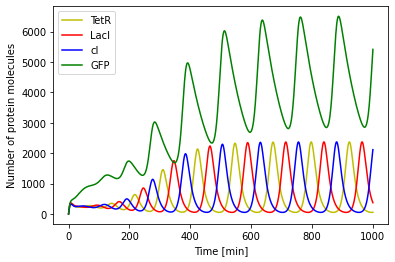

In [5]:
%matplotlib inline
fig, ax = plt.subplots(1,1)

ax.plot(t_obs, p_tetR_obs, "y-", label="TetR")
ax.plot(t_obs, p_lacI_obs, "r-", label="LacI")
ax.plot(t_obs, p_cI_obs, "b-", label="cI")
ax.plot(t_obs, p_GFP_obs, "g-", label="GFP")

ax.legend()
ax.set_xlabel("Time [min]")
ax.set_ylabel("Number of protein molecules")

# plt.savefig("Task4_figure1.png")